# Code pour la compression d'image




In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image=plt.imread("C:/Users/jerem/Documents/TRAVAIL/M1/memoire/one-piece-netflix.jpg")
image=image/255 #On code les pixels comme des floats allant de 0 à 1
l,L,d=image.shape
image2=image.reshape(l*L,3) #liste de pixels


In [5]:
def pixelisation(labels,c):
    image=np.zeros((l*L,3))
    for i in range(l*L):
        image[i]=c[labels[i]]   #i = pixel numéro i et label[i]= index cluster associé au pixel i
    return image
    
    

Cette fonction permet de remplacer chaque pixel par le pixel de la grille optimale qui lui correspond.

In [6]:
def recreate_image(labels,c):
    imag=pixelisation(labels,c)
    return(imag.reshape((l,L,3)))


Pour réaliser la compression, on a du mettre tout les pixels dans un tableau à 2 dimensions ( de taille (longueur * largeur)* 3). Une fois celle ci finit, on reconstruit l'image gâce à cette fonction.

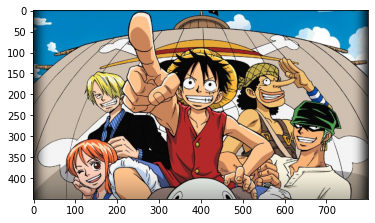

In [8]:
plt.imshow(image)


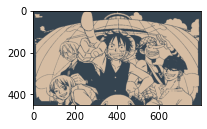

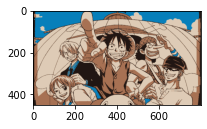

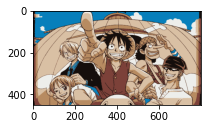

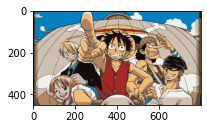

In [11]:
L1=range(2,9,2)
erreur=[]
for i in L1:
    Kmeans=KMeans(i)
    Kmeans.fit(image2) #Kmeans.fit est la fonction permettant de trouver la grille optimale grâce à l'algorithme de Lloyd.  
    labels = Kmeans.predict(image2) #kmeans.predict permet d'associé, ici, à chaque pixel l'index du cluster (dans la liste c) qui lui est associé.
    c=Kmeans.cluster_centers_
    erreur.append(Kmeans.inertia_)  #On calcul l'erreur de quantification de la grille optimale pour tout les K.
    im=recreate_image(labels,c)
    plt.figure(figsize=(3,3))
    plt.imshow(im)
#plt.figure(figsize=(7,7))
#plt.plot(L1,erreur)

Ce code permet de réaliser une compression pour différente taille K de la grille optimale. Le but est de trouver le meilleur K pour à la fois réduire la taille numérique de l'image et préserver une certaine qualité. 
Le code ne correspond pas à la courbe présenté dans le mémoire qui correspond à des compressions pour la liste range(2,21, 3) donc pour k=2,4,6...20.